# Análisis del uso de las aulas virtuales UIS

## Estadística
### Unidad I: Estadística descriptiva
**Prof. Eliana Bonalde**

___

Algunos métodos para la manipulación y análisis del conjunto de datos de las aulas virtuales. 

Importamos las librerías a utilizar y el archivo en formato .CSV

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datos_es.csv") 

Pedimos información sobre el DataFrame

In [3]:
#tamaño del archivo
df.shape

(55, 14)

In [4]:
#primeras y las últimas filas del DataFrame, respectivamente.
df.head()
#df.tail()

,Marca temporal,Carrera,Nivel,"Diariamente, ¿Cuánto tiempo da uso al MOODLE?","De 1 a 5, (siendo 1 el menor y 5 el mayor), ¿Con qué frecuencia realiza pruebas en el MOODLE?","De 1 a 10, (siendo 1 el menor y 10 el mayor), ¿Con qué frecuencia realiza trabajos, talleres o tareas en el MOODLE?",¿Qué uso le ha dado al MOODLE?,¿En qué área cree que el aula virtual le ha sido de más utilidad?,"Del 1 al 10, (siendo 1 el menor y 10 el mayor), ¿Qué tan practico y útil le resultan ser las aulas virtuales?",¿Cuál es la actividad que realiza con más frecuencia en la plataforma MOODLE?,¿Con qué frecuencia utiliza los mensajes de la plataforma MOODLE?,"Si su anterior respuesta fue nunca o poco, ¿Qué servicio de mensajes utiliza para comunicarse con sus profesores?","En su opinión, el calendario que se muestra en la plataforma:",¿Hace uso de otra plataforma educativa dentro de la universidad? ¿Cuál?
0,2021/08/12 5:11:18 p. m. GMT-5,INGENIERIA DE SISTEMAS,8,1-2 horas,2,2,Presentar examenes,Materias de carrera ( arriba de 5to semestre),8,Tareas,Nunca,Gmail/Hotmail,No le prestó casi atención.,La plataforma de las notas.
1,2021/08/12 5:11:34 p. m. GMT-5,INGENIERIA CIVIL,5,3-4 horas,3,6,Todas las anteriores,Materias de carrera ( arriba de 5to semestre),8,Talleres,Poco,Correo institucional,Puede mejorar,NaN
2,2021/08/12 5:11:40 p. m. GMT-5,INGENIERIA ELECTRICA,9,1-2 horas,2,4,Todas las anteriores,Materias de carrera ( arriba de 5to semestre),6,Cuestionarios,Poco,Gmail/Hotmail,"Está completo, bien implementado",NaN
3,2021/08/12 5:12:27 p. m. GMT-5,INGENIERIA DE SISTEMAS,8,1-2 horas,2,2,Todas las anteriores,Materias de ciencias básicas (ciclo básico),8,Cuestionarios,Poco,Slack,No me he fijado,NaN
4,2021/08/12 5:12:35 p. m. GMT-5,ECONOMIA,8,1-2 horas,4,7,Todas las anteriores,Materias de carrera ( arriba de 5to semestre),6,Tareas,Nunca,Whatsapp,Puede mejorar,NaN


In [5]:
df.shape

(55, 14)

Eliminamos las columnas que no son necesarias

In [6]:
df = df.drop(['Marca temporal'], axis=1)

Renombramos las columnas

In [7]:
df.columns = ['Carrera', 'Nivel', 'Tiempo de uso', 'Frecuencia pruebas', 'Frecuencia talleres',
              'Uso a moodle', 'Area mayor utilidad', 'Practicidad', 'Actividad mayor frecuencia', 
              'Mensajeria', 'Otro serivicio mensajes', 'Calendario','Otra plataforma usada'] 
df.head(1) #muestra solo la primera fila

,Carrera,Nivel,Tiempo de uso,Frecuencia pruebas,Frecuencia talleres,Uso a moodle,Area mayor utilidad,Practicidad,Actividad mayor frecuencia,Mensajeria,Otro serivicio mensajes,Calendario,Otra plataforma usada
0,INGENIERIA DE SISTEMAS,8,1-2 horas,2,2,Presentar examenes,Materias de carrera ( arriba de 5to semestre),8,Tareas,Nunca,Gmail/Hotmail,No le prestó casi atención.,La plataforma de las notas.


Pedimos información sobre los datos (filas y columnas)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Carrera                     55 non-null     object
 1   Nivel                       55 non-null     int64 
 2   Tiempo de uso               55 non-null     object
 3   Frecuencia pruebas          55 non-null     int64 
 4   Frecuencia talleres         55 non-null     int64 
 5   Uso a moodle                55 non-null     object
 6   Area mayor utilidad         55 non-null     object
 7   Practicidad                 55 non-null     int64 
 8   Actividad mayor frecuencia  55 non-null     object
 9   Mensajeria                  55 non-null     object
 10  Otro serivicio mensajes     54 non-null     object
 11  Calendario                  55 non-null     object
 12  Otra plataforma usada       24 non-null     object
dtypes: int64(4), object(9)
memory usage: 5.7+ KB


No hay datos nulos, en caso de haberlo podríamos utilizar la siguiente celda para eliminar las filas que los contengan (está comentada).

In [9]:
#eliminar las filas que contengan datos nulos
#df = df.dropna(axis=0) 

Pedimos los valores filas por columnas.

In [10]:
df['Carrera'].unique()

array(['INGENIERIA DE SISTEMAS', 'INGENIERIA CIVIL',
       'INGENIERIA ELECTRICA', 'ECONOMIA', 'TRABAJO SOCIAL', 'BIOLOGIA',
       'DERECHO', 'INGENIERIA ELECTRONICA', 'QUIMICA', 'GEOLOGIA',
       'FILOSOFIA', 'DISEÑO INDUSTRIAL', 'LICENCIATURA EN MUSICA',
       'INEGINERIA QUIMICA', 'INGENEIRIA MECANICA',
       'LICENCIATURA EN ESPAÑOL Y LITERATURA',
       'MICROBIOLOGIA Y BIOANALISIS', 'LICENCIATURA EN MATEMATICAS',
       'INGENIERIA MECANICA'], dtype=object)

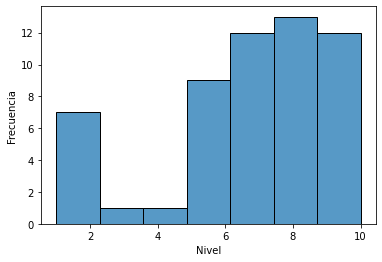

In [12]:
sns.histplot(data=df, x='Nivel')
plt.ylabel('Frecuencia')
plt.show()

## Nivel




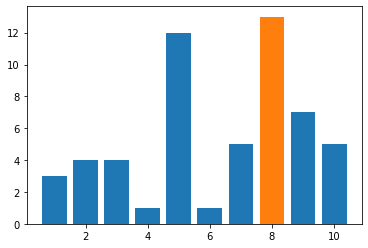

In [13]:
nivel = df['Nivel']
x_values = df['Nivel'].unique()
y_values = df['Nivel'].value_counts().tolist()
modaNivel = stat.mode(nivel)
plt.bar(x_values, y_values)
plt.bar(modaNivel, y_values)
plt.show()
plt.close('all')

# Andrea acá el analisis pues con palabras sobre la grafica, lo que se observa y lo que se puede inferir 

## Carrera

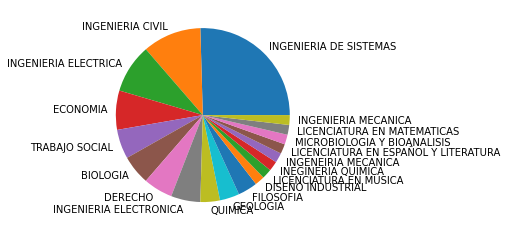

Mayoría de estudiantes que respondieron son del programa de: INGENIERIA DE SISTEMAS


In [23]:
carrera = df['Carrera']
carreras = df['Carrera'].unique()
ccarreras = df['Carrera'].value_counts().tolist()
modac = stat.mode(carrera)
plt.pie(ccarreras, labels=carreras)

plt.show()
plt.close('all')
print('Mayoría de estudiantes que respondieron son del programa de: '+ modac)

# Analisis de la carrera

## Tiempo de uso de la plataforma MOODLE

['1-2 horas' '3-4 horas' 'Al final del curso' '4 o más horas']


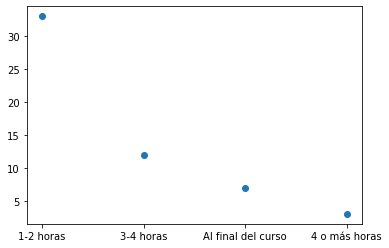

In [34]:
df.replace({'Tiempo de uso':{'Sólo al final del curso, para presentar parciales': 'Al final del curso'}}, inplace=True)
x1 = df['Tiempo de uso'].unique()
y1 = df['Tiempo de uso'].value_counts().tolist()
plt.plot(x1,y1,'o')
print(df['Tiempo de uso'].unique())

### Uso de las aulas antes y después (Gráfica de caja)

In [35]:
print(df['Apoyo antes'].mean()) #imprimir la media del procentaje de uso de las aulas antes de la pandemia
print(df['Apoyo durante'].mean()) #imprimir la media del procentaje de uso de las aulas durante la pandemia

KeyError: 'Apoyo antes'

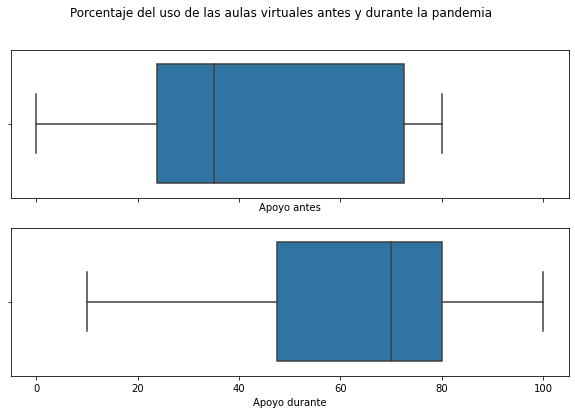

In [ ]:
fig, axes = plt.subplots(2, sharex=True, figsize=(10,6)) #2 graficas, compartir el eje x

sns.boxplot(x = df['Apoyo antes'],  orient="h", ax=axes[0])
sns.boxplot(x = df['Apoyo durante'],  orient="h", ax=axes[1])

plt.suptitle("Porcentaje del uso de las aulas virtuales antes y durante la pandemia")
plt.show()

In [ ]:
df['Area mayor utilidad'].unique()

array(['Materias de carrera ( arriba de 5to semestre)',
       'Materias de ciencias básicas (ciclo básico)', 'Electivas'],
      dtype=object)

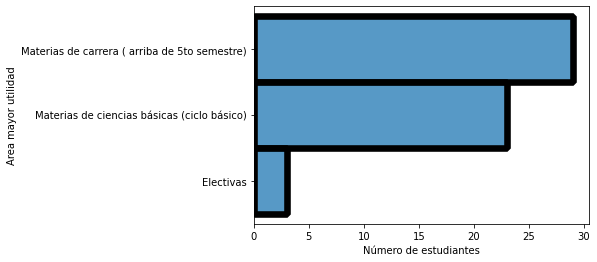

In [ ]:
sns.histplot(data=df, y="Area mayor utilidad")
plt.xlabel('Número de estudiantes')
plt.show()